In [71]:
import pandas as pd
import numpy as np

In [72]:
# Load the CSV data into a DataFrame
df = pd.read_csv("/Users/apple/Desktop/news+popularity+in+multiple+social+media+platforms/Data/News_Final.csv", header=0)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())

    IDLink                                              Title  \
0  99248.0   Obama Lays Wreath at Arlington National Cemetery   
1  10423.0        A Look at the Health of the Chinese Economy   
2  18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3  27788.0                          Finland GDP Expands In Q4   
4  27789.0  Tourism, govt spending buoys Thai economy in J...   

                                            Headline  \
0  Obama Lays Wreath at Arlington National Cemete...   
1  Tim Haywood, investment director business-unit...   
2  Nouriel Roubini, NYU professor and chairman at...   
3  Finland's economy expanded marginally in the t...   
4  Tourism and public spending continued to boost...   

                                     Source    Topic          PublishDate  \
0                                 USA TODAY    obama  2002-04-02 00:00:00   
1                                 Bloomberg  economy  2008-09-20 00:00:00   
2                                 Bloombe

In [73]:
#Handel missing data
# Check for missing values in each column
missing_data = df.isnull().sum()

# Print the number of missing values in each column
print(missing_data[missing_data > 0])

#clean data
df = df.dropna()
df.shape

Headline     15
Source      279
dtype: int64


(92945, 11)

In [74]:
from langdetect import detect

In [75]:
# Removing duplicates from the "Headline" column.
df = df.drop_duplicates(subset=['Headline'])
df.shape


(86553, 11)

In [76]:
# Removing purely numeric values from the "Headline" column.
df = df[~df['Headline'].str.isnumeric()]

# Pattern to match the specific numeric formats in headlines
pattern = r'\d+\.[A-Z]{2,3}&gt;|\b\d+\.\d+\b|\d+am|\d+pm|\d+s|\d{2,}'


# Using str.replace to remove the matched patterns with an empty string, but only modify the 'Headline' column
df['Headline'] = df['Headline'].str.replace(pattern, '', regex=True)

# Save the filtered DataFrame to a CSV file
df.to_csv('no_numeric_headlines.csv', index=False)

# Display the shape of the DataFrame to confirm no columns were removed
print(df.shape)


(86553, 11)


In [77]:
import unicodedata
import pandas as pd


# Function to remove accents
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the function to the 'Headline' column
df['Clean_Headline'] = df['Headline'].apply(remove_accents)

# Display the original and cleaned headlines
print(df[['Headline', 'Clean_Headline']])


                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director business-unit...   
2      Nouriel Roubini, NYU professor and chairman at...   
3      Finland's economy expanded marginally in the t...   
4      Tourism and public spending continued to boost...   
...                                                  ...   
93234  The June employment report is viewed as a cruc...   
93235  In addition, establish stimulating economic po...   
93236  The Palestinian government spends nearly $ mil...   
93237  Palestine Youth Orchestra prepares for first U...   
93238  Goldstein, the proprietor of the TG Travel Gro...   

                                          Clean_Headline  
0      Obama Lays Wreath at Arlington National Cemete...  
1      Tim Haywood, investment director business-unit...  
2      Nouriel Roubini, NYU professor and chairman at...  
3      Finland's economy expanded marginall

In [78]:
pip install pyspellchecker


Note: you may need to restart the kernel to use updated packages.


In [79]:
from spellchecker import SpellChecker
import pandas as pd


# Initialize the spell checker
spell = SpellChecker()

# Function to remove unrecognized words
def remove_typos(text):
    # Split the text into words
    words = text.split()
    # Check each word against the spell checker
    valid_words = [word for word in words if word in spell or len(spell.unknown([word])) == 0]
    # Join and return the valid words as a new string
    return ' '.join(valid_words)

# Apply the function to the 'Headline' column
df['Cleaned_Headline'] = df['Clean_Headline'].apply(remove_typos)

# Display the DataFrame to verify changes
print(df[['Clean_Headline', 'Cleaned_Headline']])


                                          Clean_Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director business-unit...   
2      Nouriel Roubini, NYU professor and chairman at...   
3      Finland's economy expanded marginally in the t...   
4      Tourism and public spending continued to boost...   
...                                                  ...   
93234  The June employment report is viewed as a cruc...   
93235  In addition, establish stimulating economic po...   
93236  The Palestinian government spends nearly $ mil...   
93237  Palestine Youth Orchestra prepares for first U...   
93238  Goldstein, the proprietor of the TG Travel Gro...   

                                        Cleaned_Headline  
0      Lays Wreath at National President has laid a w...  
1      investment director head for fixed income at d...  
2      professor and chairman at Global explains why ...  
3      economy expanded marginally in the t

In [80]:
import nltk
nltk.download('words')
from nltk.corpus import words

word_list = set(words.words())

def remove_non_dictionary_words(text):
    return ' '.join(word for word in text.split() if word in word_list)

# Assuming 'text' is a string containing your text data
df['Cleaned_Headline'] = df['Cleaned_Headline'].apply(remove_non_dictionary_words)



[nltk_data] Downloading package words to /Users/apple/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [81]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect_langs
from langdetect import detect_langs, LangDetectException

# Detecting the language of each headline
def detect_language_safe(text):
    try:
        return detect_langs(text)
    except LangDetectException:
        return ['unknown']

sample_headlines = df['Cleaned_Headline'].astype(str)
detected_languages = sample_headlines.apply(lambda x: detect_language_safe(x))
detected_languages

0        [en:0.9999983647231657]
1        [en:0.9999989595519065]
2        [en:0.9999972613598334]
3        [en:0.9999993308923599]
4        [en:0.9999965952953935]
                  ...           
93234    [en:0.9999966549041139]
93235    [en:0.9999944111262535]
93236    [en:0.9999977830721223]
93237    [en:0.9999982963552524]
93238    [en:0.9999953970974593]
Name: Cleaned_Headline, Length: 86553, dtype: object

In [83]:
def detect_language(text):
    try:
        languages = detect_langs(text)
        return languages[0].lang
    except LangDetectException:
        return None

# Detect language in batches
batch_size = 1000
languages = []

for i in range(0, df.shape[0], batch_size):
    batch = df['Cleaned_Headline'][i:i+batch_size].astype(str)
    batch_languages = batch.apply(detect_language)
    languages.extend(batch_languages)

# Adding detected languages as a new column to the DataFrame
df['Language'] = languages

# Filtering out non-English headlines
df_filtered = df[df['Language'] == 'en']


print(f"Original number of headlines: {df.shape[0]}")
print(f"Number of headlines with only English Language headlines: {df_filtered.shape[0]}")



Original number of headlines: 86553
Number of headlines with only English Language headlines: 85924


In [84]:
# Save the filtered DataFrame to a CSV file
df_filtered.to_csv('filtered_headlines.csv', index=False)

In [85]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
#Preprocess the Text Data
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s\+\¬\†]', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Stemmer
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(token) for token in lemmatized_text]

    # Re-join tokens into a string
    return ' '.join(stemmed_words)


In [87]:
# Apply the preprocessing function to each headline
df_filtered['Processed_Headline'] = df_filtered['Cleaned_Headline'].apply(preprocess_text)

# Display the processed headlines
print(df_filtered[['Headline', 'Processed_Headline']])

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director business-unit...   
2      Nouriel Roubini, NYU professor and chairman at...   
3      Finland's economy expanded marginally in the t...   
4      Tourism and public spending continued to boost...   
...                                                  ...   
93234  The June employment report is viewed as a cruc...   
93235  In addition, establish stimulating economic po...   
93236  The Palestinian government spends nearly $ mil...   
93237  Palestine Youth Orchestra prepares for first U...   
93238  Goldstein, the proprietor of the TG Travel Gro...   

                                      Processed_Headline  
0                                      laid wreath honor  
1         invest director head fix incom beig book state  
2                 professor chairman global economi face  
3      economi expand margin three end prev

/var/folders/fq/_647ffs56fj29659nks78q8m0000gn/T/ipykernel_65733/1863648691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Processed_Headline'] = df_filtered['Cleaned_Headline'].apply(preprocess_text)


### LSA

In [88]:
#Prepare Corpus
from gensim import corpora, models

# Tokenize the processed headlines
texts = [headline.split() for headline in df_filtered['Processed_Headline']]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(texts)

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert dictionary to a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [105]:
# Train LSA model.
num_topics = 4
num_words = 100
lsa_model = models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
lsa_model.print_topics(num_topics=num_topics, num_words=num_words)



[(0,
  '0.850*"economi" + 0.217*"said" + 0.141*"econom" + 0.140*"growth" + 0.121*"percent" + 0.110*"global" + 0.099*"new" + 0.093*"year" + 0.090*"first" + 0.086*"quarter" + 0.077*"last" + 0.070*"grew" + 0.065*"grow" + 0.063*"would" + 0.061*"rate" + 0.056*"govern" + 0.051*"per" + 0.051*"could" + 0.050*"data" + 0.048*"accord" + 0.046*"like" + 0.045*"state" + 0.041*"three" + 0.040*"expand" + 0.039*"one" + 0.039*"cent" + 0.039*"may" + 0.038*"oil" + 0.038*"next" + 0.037*"sinc" + 0.036*"pace" + 0.036*"domest" + 0.036*"world" + 0.036*"market" + 0.035*"feder" + 0.034*"financi" + 0.033*"report" + 0.033*"two" + 0.031*"third" + 0.031*"also" + 0.031*"time" + 0.030*"make" + 0.030*"busi" + 0.029*"strong" + 0.029*"continu" + 0.029*"come" + 0.028*"recent" + 0.027*"second" + 0.026*"final" + 0.026*"product" + 0.026*"still" + 0.026*"back" + 0.026*"countri" + 0.025*"remain" + 0.025*"spend" + 0.025*"offici" + 0.025*"peopl" + 0.024*"interest" + 0.024*"take" + 0.024*"show" + 0.024*"previous" + 0.024*"annual"

In [90]:
#Determine the number of topics

from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lsi_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)


Coherence Score: 0.3258064973856116


Num Topics: 2, Coherence Score: 0.443687077783143
Num Topics: 4, Coherence Score: 0.41179440093438535
Num Topics: 6, Coherence Score: 0.39079558661158503
Num Topics: 8, Coherence Score: 0.36365095995390306
Num Topics: 10, Coherence Score: 0.3487058480098848
Num Topics: 12, Coherence Score: 0.36476517159520955
Num Topics: 14, Coherence Score: 0.36058635240746967
Num Topics: 16, Coherence Score: 0.35862591287153883
Num Topics: 18, Coherence Score: 0.35462679724635743
Num Topics: 20, Coherence Score: 0.3422286852723427


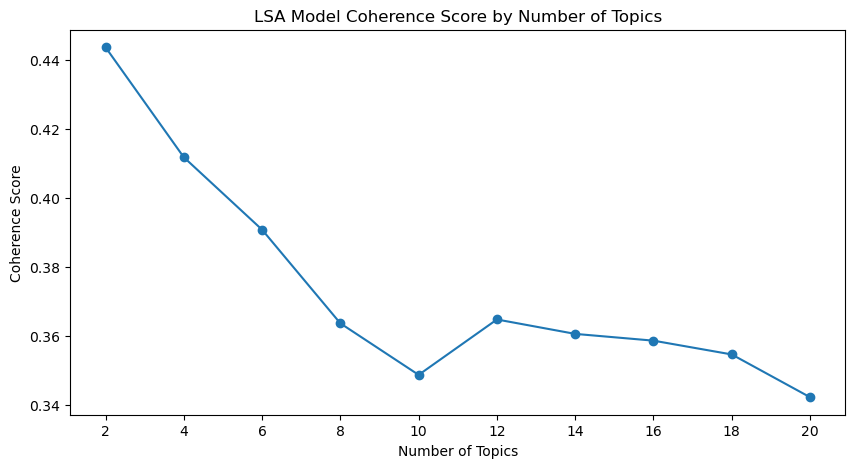

In [92]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


# Define the range of topics to explore
topic_range = range(2, 21, 2)

coherence_scores = []

for num_topics in topic_range:
    # Train LSA model
    lsi_model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    
    # Calculate Coherence Score
    coherence_model = CoherenceModel(model=lsi_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title('LSA Model Coherence Score by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()


Based on this graph, the optimal number of topics for this dataset, judged purely by coherence score, might be around 2 where has the highest coherence score

### Document-Term Matrix (DTM): Transform the preprocessed headlines into a DTM, which quantifies the headlines by the occurrence of words.

In [18]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
#
dtm = vectorizer.fit_transform(df_filtered['Processed_Headline'])


dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
# dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

dtm_df

,aback,abandon,abat,abbey,abhor,abid,abil,abject,abl,ablaz,...,zeal,zero,zigzag,zinc,zing,zip,zloti,zombi,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SVD

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

topics = ['economy', 'microsoft', 'obama', 'palestine']

for topic in topics:
    # Filter all headlines for the current topic
    docs = df_filtered[df_filtered['Topic'] == topic]['Processed_Headline']
    
    # Apply TF-IDF conversion
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Get the average TF-IDF score for each term and sort it
    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_scores = zip(feature_names, avg_tfidf_scores)
    sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:10]  # 取前10个高TF-IDF分数的词项
    
    print(f"Topic'{topic}'highest weighted terms:")
    for term, score in sorted_scores:
        print(f"{term} ({score:.4f})")
    print("\n")


Topic'economy'highest weighted terms:
economi (0.0734)
econom (0.0459)
said (0.0267)
growth (0.0258)
global (0.0222)
percent (0.0167)
new (0.0166)
year (0.0158)
govern (0.0135)
grow (0.0135)


Topic'microsoft'highest weighted terms:
new (0.0386)
compani (0.0226)
cloud (0.0143)
today (0.0137)
work (0.0126)
use (0.0123)
make (0.0122)
said (0.0121)
like (0.0120)
come (0.0115)


Topic'obama'highest weighted terms:
said (0.0268)
administr (0.0210)
state (0.0192)
presid (0.0174)
visit (0.0160)
meet (0.0142)
new (0.0142)
presidenti (0.0126)
final (0.0110)
say (0.0103)


Topic'palestine'highest weighted terms:
israel (0.0282)
state (0.0186)
said (0.0181)
medium (0.0160)
servic (0.0127)
support (0.0123)
visit (0.0119)
peopl (0.0111)
peac (0.0111)
intern (0.0109)




In [96]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Define the number of topics
n_topics = 4

# Perform SVD
svd = TruncatedSVD(n_components=n_topics)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Fit LSA model to the DTM
dtm_lsa = lsa.fit_transform(dtm_df)

# Examine the explained variance to help decide how many topics to retain
explained_variance = svd.explained_variance_ratio_.sum()
print(f"Explained variance of the SVD step: {explained_variance*100:.2f}%")

# Inspect terms associated with each topic to label them accordingly
terms = np.array(dtm_df.columns)
for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10]
    print(f"Topic {i+1}:")
    print(", ".join([t[0] for t in sorted_terms]))


Explained variance of the SVD step: 6.11%
Topic 1:
economi, said, econom, growth, percent, global, new, year, first, quarter
Topic 2:
said, econom, new, would, first, growth, state, one, last, presid
Topic 3:
new, compani, economi, first, one, accord, make, updat, get, work
Topic 4:
econom, growth, global, data, year, per, quarter, cent, slowdown, accord


### PCA

In [20]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

In [21]:
# from sklearn.preprocessing import StandardScaler

# # Standardizing the features
# scaler = StandardScaler()
# dtm_scaled = scaler.fit_transform(dtm_df)

In [ ]:
# from sklearn.decomposition import IncrementalPCA

# def batches(arr, batch_size):
#     # If batch_size is None, we default to 1/10th of the array length
#     if batch_size is None:
#         batch_size = arr.shape[0] // 10
#     for i in range(0, arr.shape[0], batch_size):
#         yield arr[i:i + batch_size]

# # Initialize IncrementalPCA with default parameters
# ipca = IncrementalPCA()

# # Assuming you have a batches function defined properly
# for batch in batches(dtm_scaled, batch_size):
#     ipca.partial_fit(batch)

In [ ]:
# #Perform PCA directly

# pca = PCA().fit(dtm_df)  
# cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# # Find the # of components that account for a 95% cumulative variance
# n_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.95]) + 1

# n_components

In [23]:
# # Initialize PCA, choose the number of components 
# pca = PCA(n_components=#)

# # Fit PCA on the DTM or standardized DTM
# dtm_pca = pca.fit_transform(dtm_df) 

# dtm_pca

In [ ]:
# # Randomized PCA
# from sklearn.decomposition import PCA

# pca = PCA(n_components=None, svd_solver='randomized')

# dtm_pca = pca.fit(dtm_scaled)

# dtm_pca

In [23]:
# print(pca.explained_variance_ratio_) 

[0.00049861 0.00047081 0.00042608 0.000423   0.0003945  0.00038087
 0.00036276 0.00036027 0.00035563 0.00035427 0.00035267 0.00034893
 0.00034245 0.00033906 0.00033685 0.00033353 0.0003318  0.00032834
 0.00032772 0.00032293 0.00031826 0.00031708 0.0003143  0.00031185
 0.00031049 0.00030838 0.00030693 0.00030289 0.00030081 0.00029733
 0.00029724 0.00029551 0.00029462 0.00029337 0.00029102 0.00028739
 0.0002866  0.00028579 0.00028439 0.00028321 0.00027974 0.00027852
 0.00027789 0.00027755 0.00027713 0.0002751  0.000274   0.00027298
 0.00027207 0.00026922 0.000269   0.00026814 0.00026662 0.00026607
 0.00026561 0.00026491 0.00026409 0.0002631  0.00026228 0.00026095
 0.00025987 0.00025947 0.00025861 0.00025782 0.00025689 0.00025617
 0.00025462 0.00025426 0.0002527  0.00025243 0.00025188 0.00025081
 0.00025046 0.00024892 0.00024871 0.00024753 0.00024715 0.00024581
 0.00024559 0.00024486 0.00024392 0.0002427  0.00024238 0.00024099
 0.00024083 0.0002402  0.00023883 0.00023861 0.00023786 0.0002